# Case Study - Spam Detection

### The main aim of this project is to demonstrate the basics of Natural Language Processing (NLP).

Major Steps Involved:

1. Text Data Visualisation
2. Text Data Preprocessing
3. Text Data To Numerical Vector Conversion using Bag of Words

We will follow the steps mentioned below:

1. Data Loading
2. Exploratory Data Analysis
3. Data Preparation
 Train Test Split
 Data Preprocessing (special characters, stop words, lower case, stemming, etc)
 Converting text to numerical vector using Bag of Words
 Preprocessing Test Data
4. Training on Train Data
5. Predictions on Test Data
6. Model Evaluation

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

Read the Data

In [3]:
df = pd.read_csv('email_data.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


In [3]:
df.shape

(5171, 4)

In [5]:
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

Exploratory Data Analysis

In [4]:
df['label'].value_counts()

label
ham     3672
spam    1499
Name: count, dtype: int64

In [38]:
df['label'].value_counts(normalize=True)

label
ham     0.710114
spam    0.289886
Name: proportion, dtype: float64

<Axes: xlabel='label', ylabel='count'>

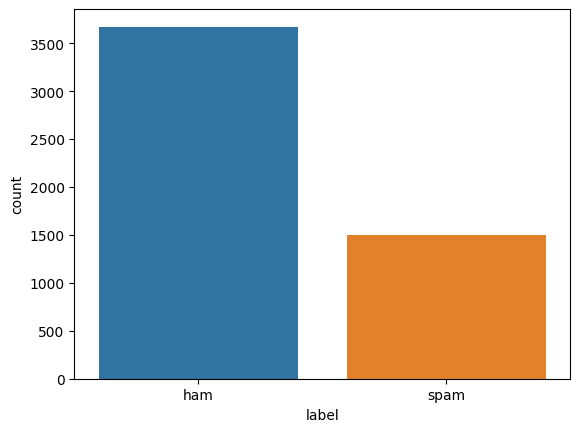

In [39]:
sns.countplot(x='label', data=df)

Data Preparation - Split the data into train and test set

In [40]:
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [4]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\nthis deal is to ...,0


In [11]:
y = df['label']
x = df['text']

In [12]:
# Splitting into train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [9]:
x_train.head()

5132    Subject: april activity surveys\nwe are starti...
2067    Subject: message subject\nhey i ' am julie ^ _...
4716    Subject: txu fuels / sds nomination for may 20...
4710    Subject: re : richardson volumes nov 99 and de...
2268    Subject: a new era of online medical care .\na...
Name: text, dtype: object

In [45]:
x_train.shape

(4136,)

Data Preparation - Text Preprocessing

In [13]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [14]:
# initialize the inbuilt stemmer
stemmer = PorterStemmer()

In [40]:
# We can also use lemmatizer instead of Stemmer
lemmatizer = WordNetLemmatizer

In [41]:
def preprocess(raw_text, flag):
    # removing special characters and digits
    sentence = re.sub('[^a-zA-Z]', ' ', raw_text)

    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()

    # remove stop words
    clean_tokens = [t for t in tokens if not t in stopwords.words('english')]

    # stemming/lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    return pd.Series([' '.join(clean_tokens), len(clean_tokens)])

In [ ]:
# %%timeit

# # Convert to series
# X_train['text'].apply(lambda x: preprocess(x, 'stem'))

# # 2min 35 sec approx run time

In [ ]:
# ! pip install tqdm

In [17]:
from tqdm import tqdm, tqdm_notebook

In [20]:
# Register `pandas.progress_apply` and `pandas.Series.map_apply` with `tqdm`

tqdm.pandas()

In [21]:
# Now you can use `progress_apply` instead of `apply`
# and `progress_map` instead of `map`

temp_df = x_train.progress_apply(lambda x: preprocess(x, 'stem'))

temp_df.head()

100%|██████████| 4136/4136 [10:56<00:00,  6.30it/s]


,0,1
5132,subject april activ survey start collect data ...,88
2067,subject messag subject hey juli turn high scho...,44
4716,subject txu fuel sd nomin may attach may nomin...,34
4710,subject richardson volum nov dec meter nick su...,105
2268,subject new era onlin medic care new era onlin...,36


In [22]:
temp_df.columns = ['clean_text_stem', 'text_length_stem']

In [23]:
temp_df.head()

,clean_text_stem,text_length_stem
5132,subject april activ survey start collect data ...,88
2067,subject messag subject hey juli turn high scho...,44
4716,subject txu fuel sd nomin may attach may nomin...,34
4710,subject richardson volum nov dec meter nick su...,105
2268,subject new era onlin medic care new era onlin...,36


In [24]:
x_train = pd.concat([x_train, temp_df], axis=1)

In [16]:
x_train.head()

,text,clean_text_stem,text_length_stem
5132,Subject: april activity surveys\nwe are starti...,subject april activ survey start collect data ...,88
2067,Subject: message subject\nhey i ' am julie ^ _...,subject messag subject hey juli turn high scho...,44
4716,Subject: txu fuels / sds nomination for may 20...,subject txu fuel sd nomin may attach may nomin...,34
4710,Subject: re : richardson volumes nov 99 and de...,subject richardson volum nov dec meter nick su...,105
2268,Subject: a new era of online medical care .\na...,subject new era onlin medic care new era onlin...,36


Creating the WordCloud

# ! pip install wordcloud

In [25]:
from wordcloud import WordCloud

In [18]:
y_train

5132     ham
2067    spam
4716     ham
4710     ham
2268    spam
        ... 
4426     ham
466      ham
3092    spam
3772     ham
860      ham
Name: label, Length: 4136, dtype: object

In [28]:
spam_df = x_train.loc[y_train=='spam', :]
spam_df.head()

,text,clean_text_stem,text_length_stem
2067,Subject: message subject\nhey i ' am julie ^ _...,subject messag subject hey juli turn high scho...,44
2268,Subject: a new era of online medical care .\na...,subject new era onlin medic care new era onlin...,36
4998,Subject: sparkasse security issue\nsehr geehrt...,subject sparkass secur issu sehr geehrt kundin...,132
366,Subject: druuugs onliiiiine very cheaaaap\nhel...,subject druuug onliiiiin cheaaaap hello calvin...,50
2683,Subject: survivor junction\na genuine college ...,subject survivor junction genuin colleg degre ...,139


In [29]:
words = ' '.join(spam_df['clean_text_stem'])
print(words[:100])

subject messag subject hey juli turn high school senior houston tx wait long time day final got wish


In [21]:
spam_df = x_train.loc[y_train=='spam', :]

words = ' '.join(spam_df['clean_text_stem'])

cleaned_word = ' '.join([word for word in words.split()if 'subject' not in word])

In [22]:
spam_wordcloud = WordCloud(stopwords=stopwords.words('english'),
                           background_color='black',
                           width=1600,
                           height=800
                           ).generate(cleaned_word)

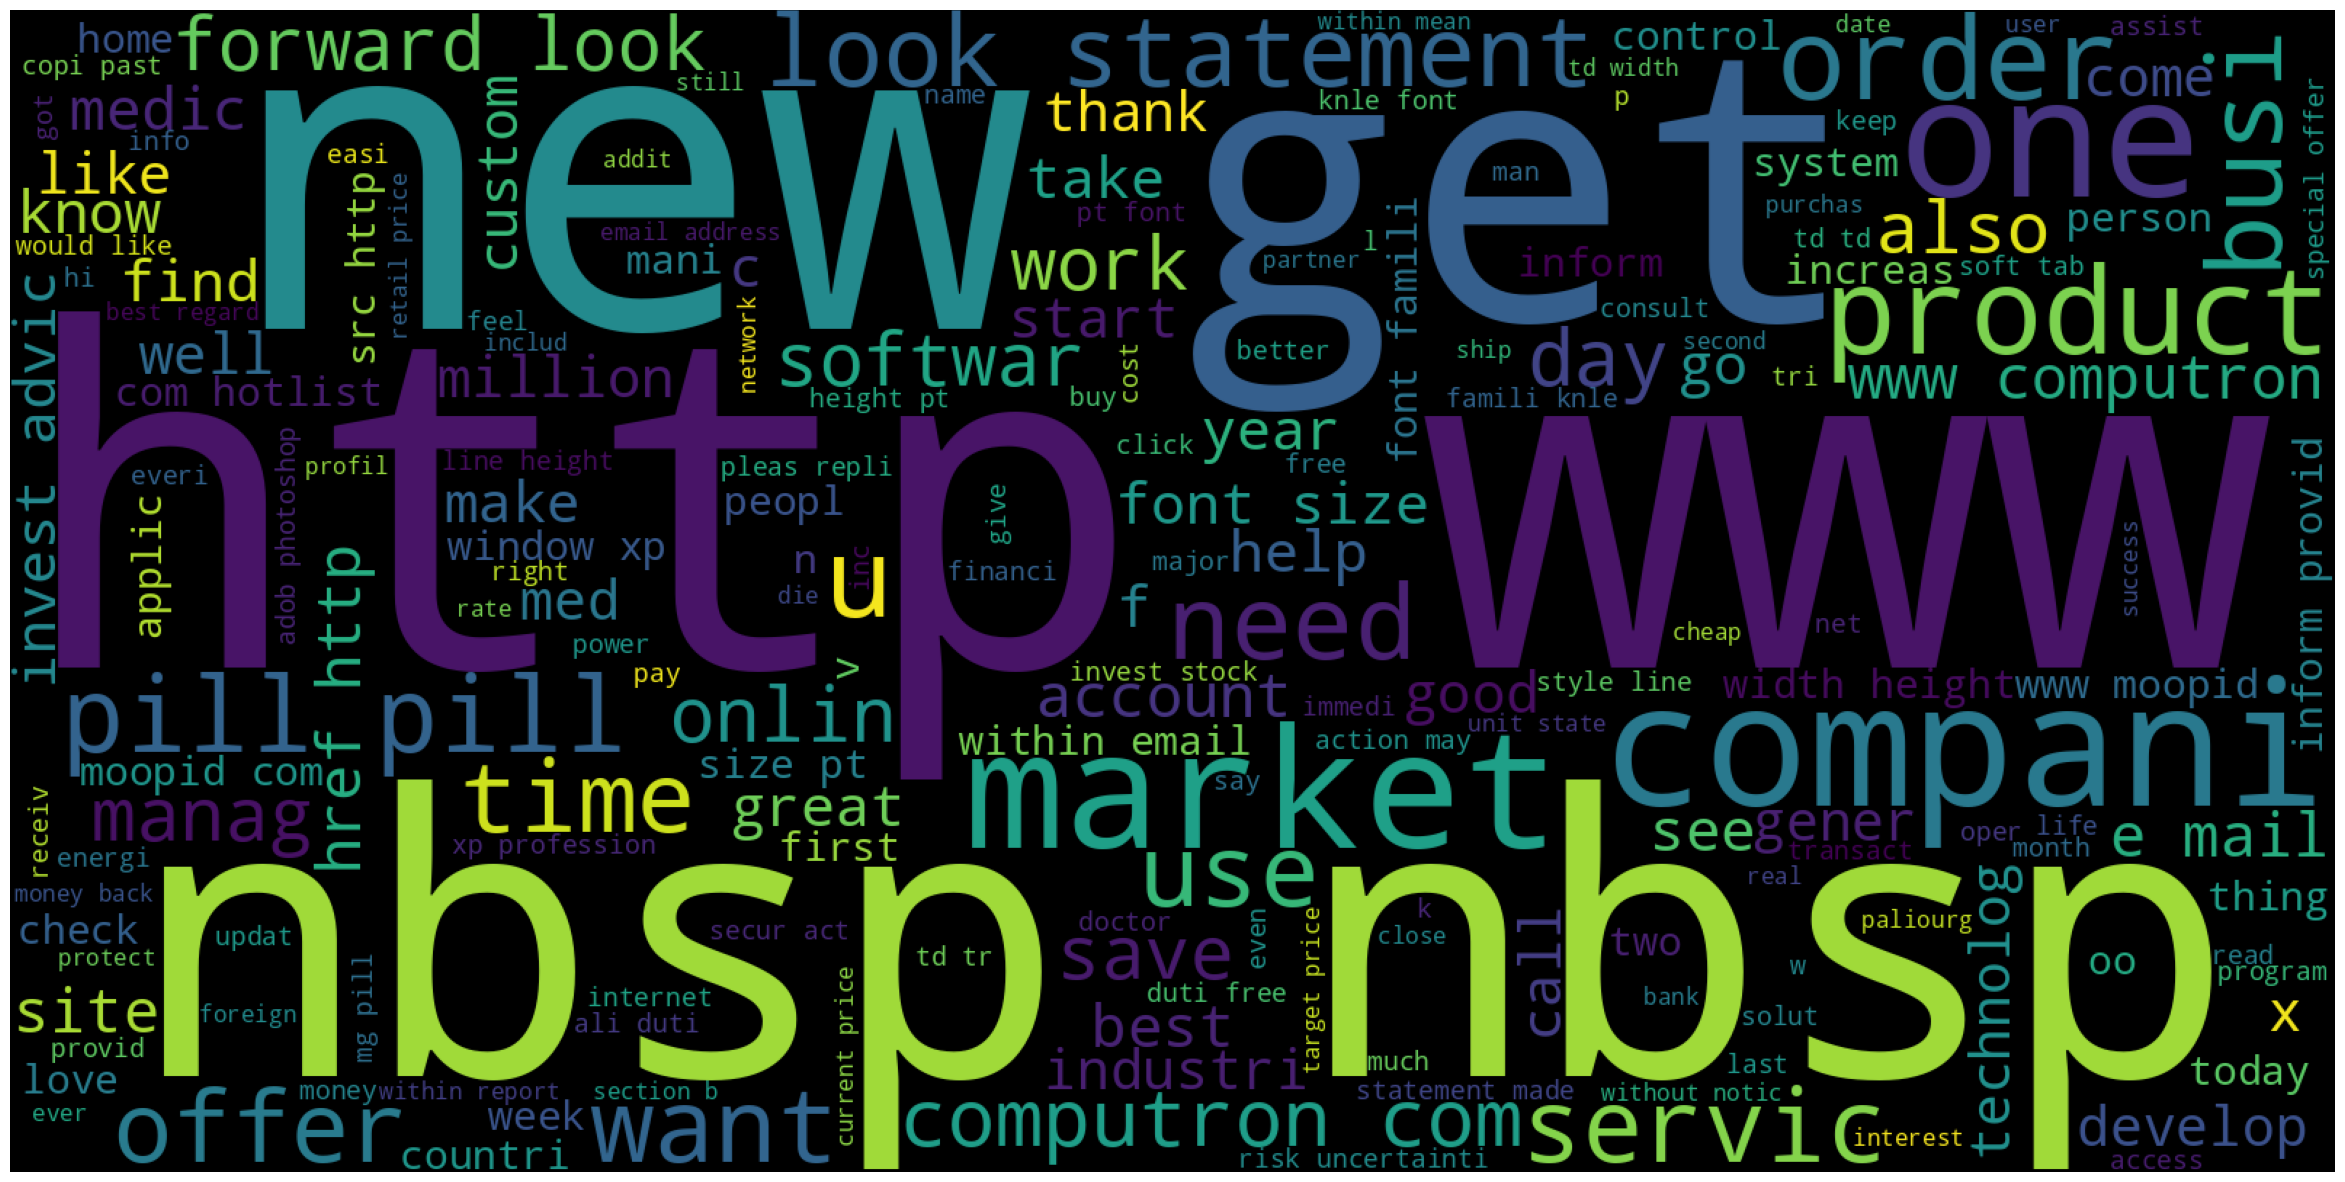

In [23]:
plt.figure(1, figsize=(30, 20))
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.show()

In [38]:
ham_df = x_train.loc[y_train=='ham', :]

words = ' '.join(ham_df['clean_text_stem'])

cleaned_word = " ".join([word for word in words.split() 
                        if 'subject' not in word])

In [39]:
ham_wordcloud = WordCloud(stopwords=stopwords.words('english'),
                           background_color='black',
                           width=1600,
                           height=800
                           ).generate(cleaned_word)

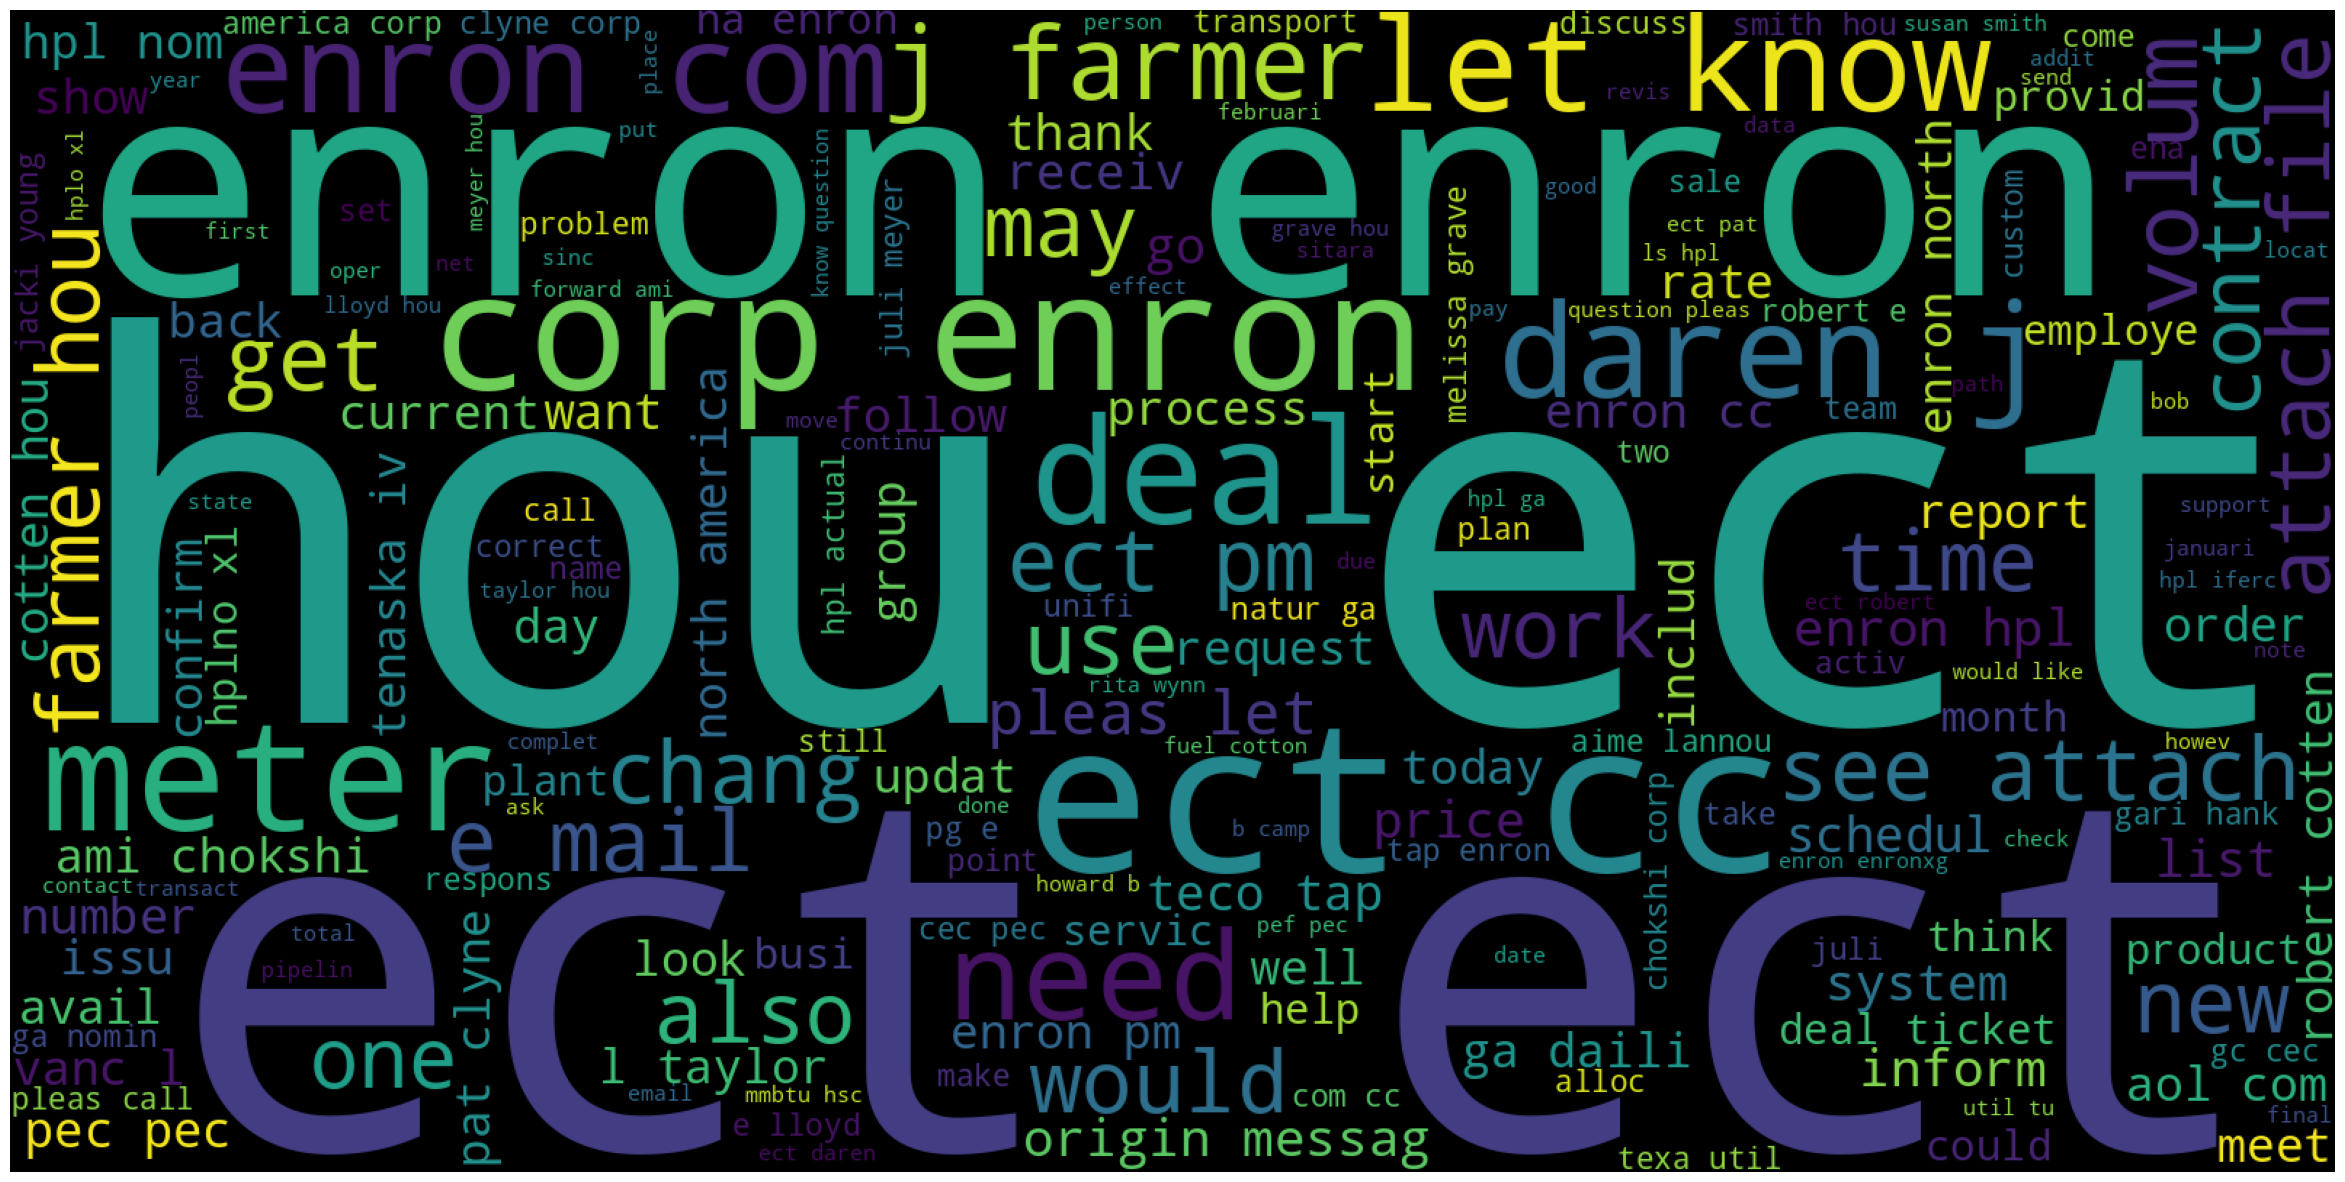

In [40]:
plt.figure(1,figsize=(30,20))
plt.imshow(ham_wordcloud)
plt.axis('off')
plt.show()

In [24]:
corel = """
CorelDRAW is a powerful vector graphics software that allows us to create high-quality, professional designs. It's perfect for creating a variety of marketing materials, including brochures, logos, and presentations.

In this presentation, I will showcase the designs I created for Biomedical Limited, using CorelDRAW. I will also discuss the specific features of CorelDRAW that I used to create the designs."""

In [27]:
corel_wordcloud = WordCloud(stopwords=stopwords.words('english'),
                            background_color='black',
                            width=1500,
                            height=800
                            ).generate(corel)

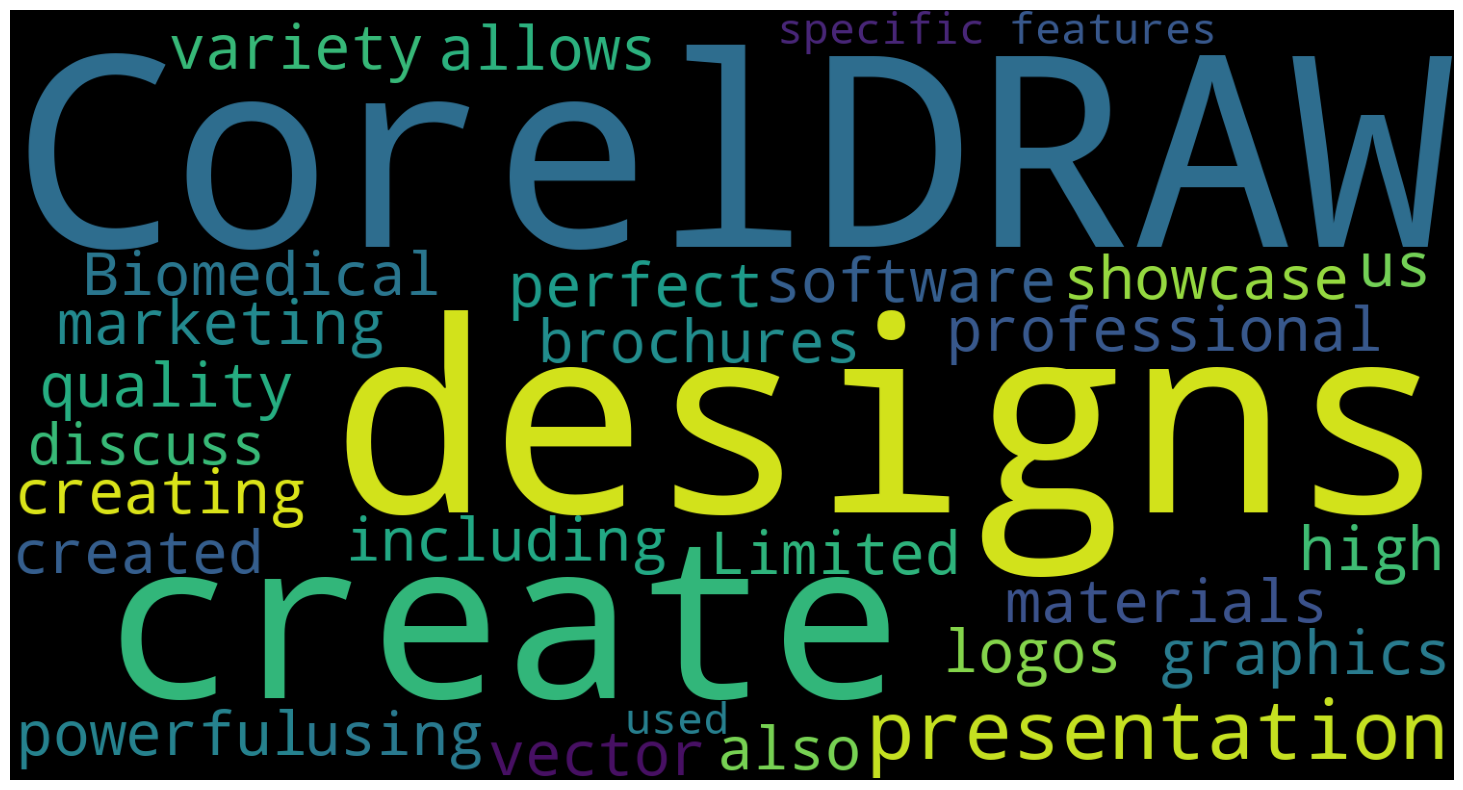

In [45]:
plt.figure(1, figsize=(30,20))
plt.imshow(corel_wordcloud)
plt.axis('off')
plt.show()

Converting Text to Numerical vectors - BOW Representation

Step 1 - Learn the vocabulary from the train data
Step 2 - Transform the train['emails'] to x_train (i.e. DTM)
Step 3 - Transform the test['emails'] to x_test (i.e. DTM)

In [46]:
x_train.head()

,text,clean_text_stem,text_length_stem
5132,Subject: april activity surveys\nwe are starti...,subject april activ survey start collect data ...,88
2067,Subject: message subject\nhey i ' am julie ^ _...,subject messag subject hey juli turn high scho...,44
4716,Subject: txu fuels / sds nomination for may 20...,subject txu fuel sd nomin may attach may nomin...,34
4710,Subject: re : richardson volumes nov 99 and de...,subject richardson volum nov dec meter nick su...,105
2268,Subject: a new era of online medical care .\na...,subject new era onlin medic care new era onlin...,36


In [30]:
from sklearn.feature_extraction.text import CountVectorizer

vocab = CountVectorizer()

x_train_bow = vocab.fit_transform(x_train['clean_text_stem'])


In [49]:
x_train_bow

<4136x33977 sparse matrix of type '<class 'numpy.int64'>'
	with 247598 stored elements in Compressed Sparse Row format>

In [31]:
print("Total unique words:", len(vocab.vocabulary_))

print("Type of train features:", type(x_train_bow))

print("Shape of input data:", x_train_bow.shape)

Total unique words: 33977
Type of train features: <class 'scipy.sparse._csr.csr_matrix'>
Shape of input data: (4136, 33977)


In [32]:
print(x_train_bow.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [34]:
from sys import getsizeof

print(type(x_train_bow))
print(getsizeof(x_train_bow), "Bytes")

<class 'scipy.sparse._csr.csr_matrix'>
48 Bytes


In [35]:
from sys import getsizeof

print(type(x_train_bow.toarray()))
print(getsizeof(x_train_bow.toarray()), "Bytes")

<class 'numpy.ndarray'>
1124231104 Bytes


Preprocessing the Test Data

In [36]:
x_test.head()

1566    Subject: hpl nom for march 30 , 2001\n( see at...
1988    Subject: online pharxmacy 80 % off all meds\nd...
1235    Subject: re : nom / actual volume for april 17...
2868    Subject: re : meter 8740 dec 99\nrobert and i ...
4903    Subject: re : coastal oil & gas corporation\nm...
Name: text, dtype: object

In [43]:
temp_df = x_test.progress_apply(lambda x: preprocess(x, 'stem'))

temp_df.head()

# Now you can use `progress_apply` instead of `apply`
# and `progress_map` instead of `map`

100%|██████████| 1035/1035 [04:15<00:00,  4.06it/s]


,0,1
1566,subject hpl nom march see attach file hplno xl...,11
1988,subject onlin pharxmaci med disscount phafrmac...,2590
1235,subject nom actual volum april th agre eileen ...,44
2868,subject meter dec robert put head togeth decid...,332
4903,subject coastal oil ga corpor melissa deal cre...,1241


In [46]:
temp_df.columns = ['clean_text_lemma', 'text_length_lemma']

temp_df.head()

,clean_text_lemma,text_length_lemma
1566,subject hpl nom march see attach file hplno xl...,11
1988,subject onlin pharxmaci med disscount phafrmac...,2590
1235,subject nom actual volum april th agre eileen ...,44
2868,subject meter dec robert put head togeth decid...,332
4903,subject coastal oil ga corpor melissa deal cre...,1241


In [47]:
x_test = pd.concat([x_test, temp_df], axis=1)

x_test.head()

,text,clean_text_lemma,text_length_lemma
1566,"Subject: hpl nom for march 30 , 2001\n( see at...",subject hpl nom march see attach file hplno xl...,11
1988,Subject: online pharxmacy 80 % off all meds\nd...,subject onlin pharxmaci med disscount phafrmac...,2590
1235,Subject: re : nom / actual volume for april 17...,subject nom actual volum april th agre eileen ...,44
2868,Subject: re : meter 8740 dec 99\nrobert and i ...,subject meter dec robert put head togeth decid...,332
4903,Subject: re : coastal oil & gas corporation\nm...,subject coastal oil ga corpor melissa deal cre...,1241


In [52]:
x_test_bow = vocab.transform(x_test['clean_text_lemma'])

Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train_bow, y_train)

LogisticRegression()

In [53]:
y_test_pred = classifier.predict(x_test_bow)

In [54]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.9797101449275363
              precision    recall  f1-score   support

         ham       0.99      0.98      0.99       742
        spam       0.96      0.97      0.96       293

    accuracy                           0.98      1035
   macro avg       0.97      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035



Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train_bow, y_train)

DecisionTreeClassifier()

In [57]:
y_test_pred = classifier.predict(x_test_bow)

In [58]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.9439613526570049
              precision    recall  f1-score   support

         ham       0.96      0.96      0.96       742
        spam       0.90      0.91      0.90       293

    accuracy                           0.94      1035
   macro avg       0.93      0.93      0.93      1035
weighted avg       0.94      0.94      0.94      1035



Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train_bow, y_train)

RandomForestClassifier()

In [61]:
y_test_pred = classifier.predict(x_test_bow)

In [62]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.9777777777777777
              precision    recall  f1-score   support

         ham       0.99      0.98      0.98       742
        spam       0.95      0.97      0.96       293

    accuracy                           0.98      1035
   macro avg       0.97      0.98      0.97      1035
weighted avg       0.98      0.98      0.98      1035

